<a href="https://colab.research.google.com/github/brianhphillips/testrepo/blob/main/DecTree_Oscars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Step 1: Import libraries
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [9]:
# Step 2: Download the dataset
path = kagglehub.dataset_download("thedevastator/oscar-winning-directors-analysis")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/oscar-winning-directors-analysis


In [10]:
# Step 3: Load dataset
data_path = f"{path}/Oscar Winners - Director.csv"
df = pd.read_csv(data_path)

In [11]:
# Step 4: Split features and target
X = df.drop('Nomination/Winner', axis=1)
y = df['Nomination/Winner']

# Step 4.1: Handle missing values in the target variable
# Drop rows where the target variable 'Nomination/Winner' is NaN
data_cleaned = df.dropna(subset=['Nomination/Winner'])
X = data_cleaned.drop('Nomination/Winner', axis=1)
y = data_cleaned['Nomination/Winner']

In [12]:
# Step 5: Handle categorical features using one-hot encoding
# Identify object type columns which are likely categorical strings
categorical_cols = X.select_dtypes(include='object').columns
# Apply one-hot encoding to these columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True) # drop_first avoids multicollinearity

In [13]:
# Step 6: Split into train and test (optional for visualization)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [14]:
# Step 7: Train Decision Tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

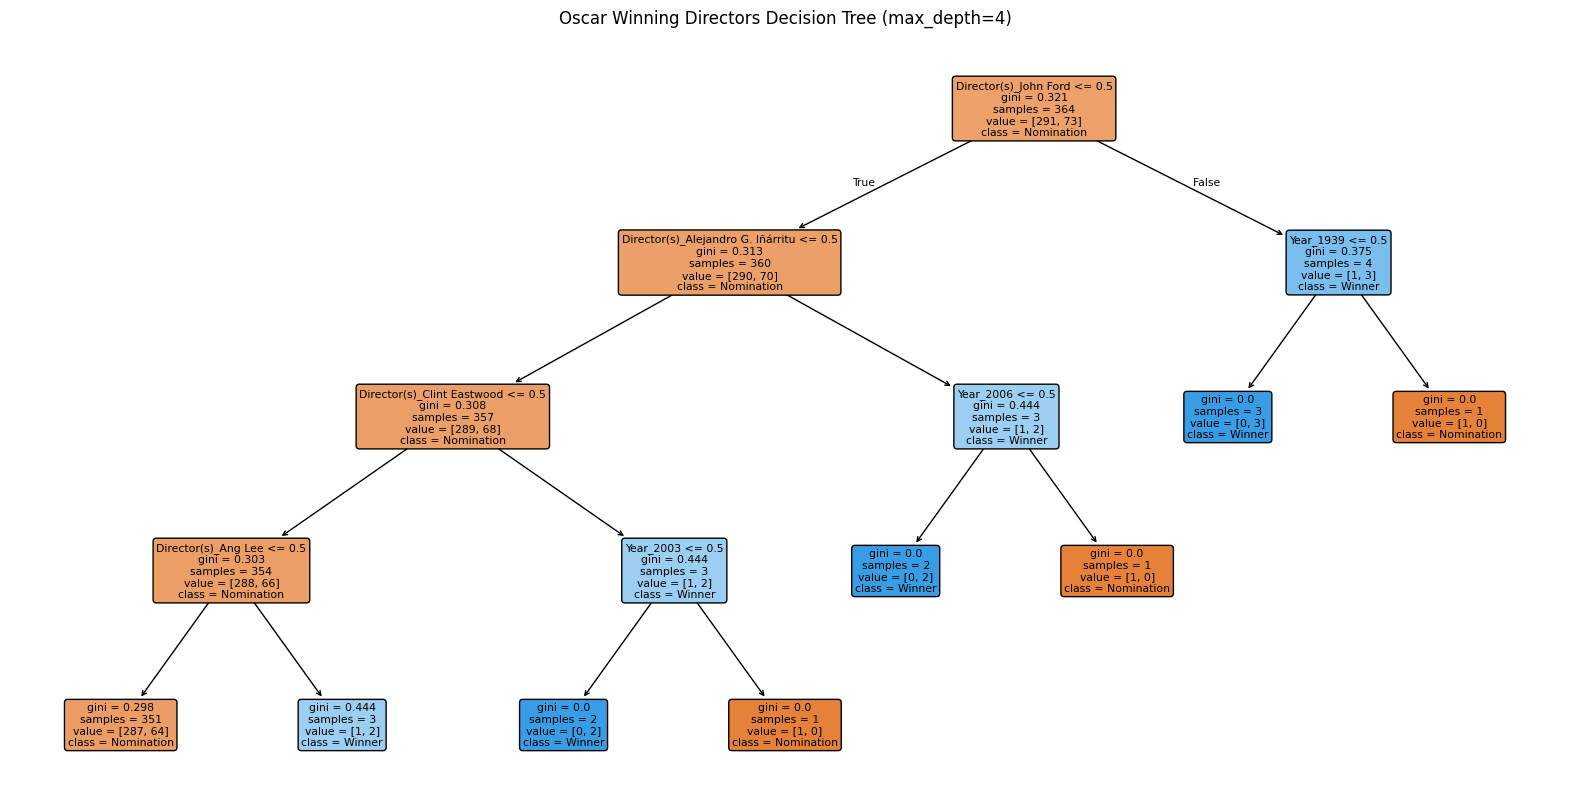

In [15]:
# Step 8: Visualize the tree
plt.figure(figsize=(20, 10))
# Use the column names from X_encoded as feature names
plot_tree(clf, feature_names=X_encoded.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.title("Oscar Winning Directors Decision Tree (max_depth=4)") # Updated title
plt.show()